# IELTS训练过程

记录一下雅思训练过程

我使用的是 [雅思模考中心_趴趴模考中心一站式备考服务](https://ielts.papaen.com/ielts/index) 这个平台进行练习

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import yaml
import seaborn as sns
from datetime import datetime
import numpy as np

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 针对macOS
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 读取YAML文件
with open('train_log.yml', 'r') as file:
    data = yaml.safe_load(file)

# 处理听力数据
listening_data = []
for test, details in data['Listening'].items():
    listening_data.append({
        'test': test,
        'date': datetime.strptime(details['date'], '%Y-%m-%d %H:%M:%S'),
        'score': details['score'],
        'band': details['band'],
        'time': details['time']
    })

# 处理阅读数据
reading_data = []
for test, details in data['Reading'].items():
    reading_data.append({
        'test': test,
        'date': datetime.strptime(details['date'], '%Y-%m-%d %H:%M:%S'),
        'score': details['score'],
        'band': details['band'],
        'time': details['time']
    })

# 创建DataFrame
listening_df = pd.DataFrame(listening_data)
reading_df = pd.DataFrame(reading_data)

# 按日期排序
listening_df = listening_df.sort_values('date')
reading_df = reading_df.sort_values('date')

/var/folders/bg/snc3b8lx44b5smmrcsxf6mz80000gn/T/ipykernel_12970/3348857625.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=['Listening', 'Reading'], patch_artist=True)


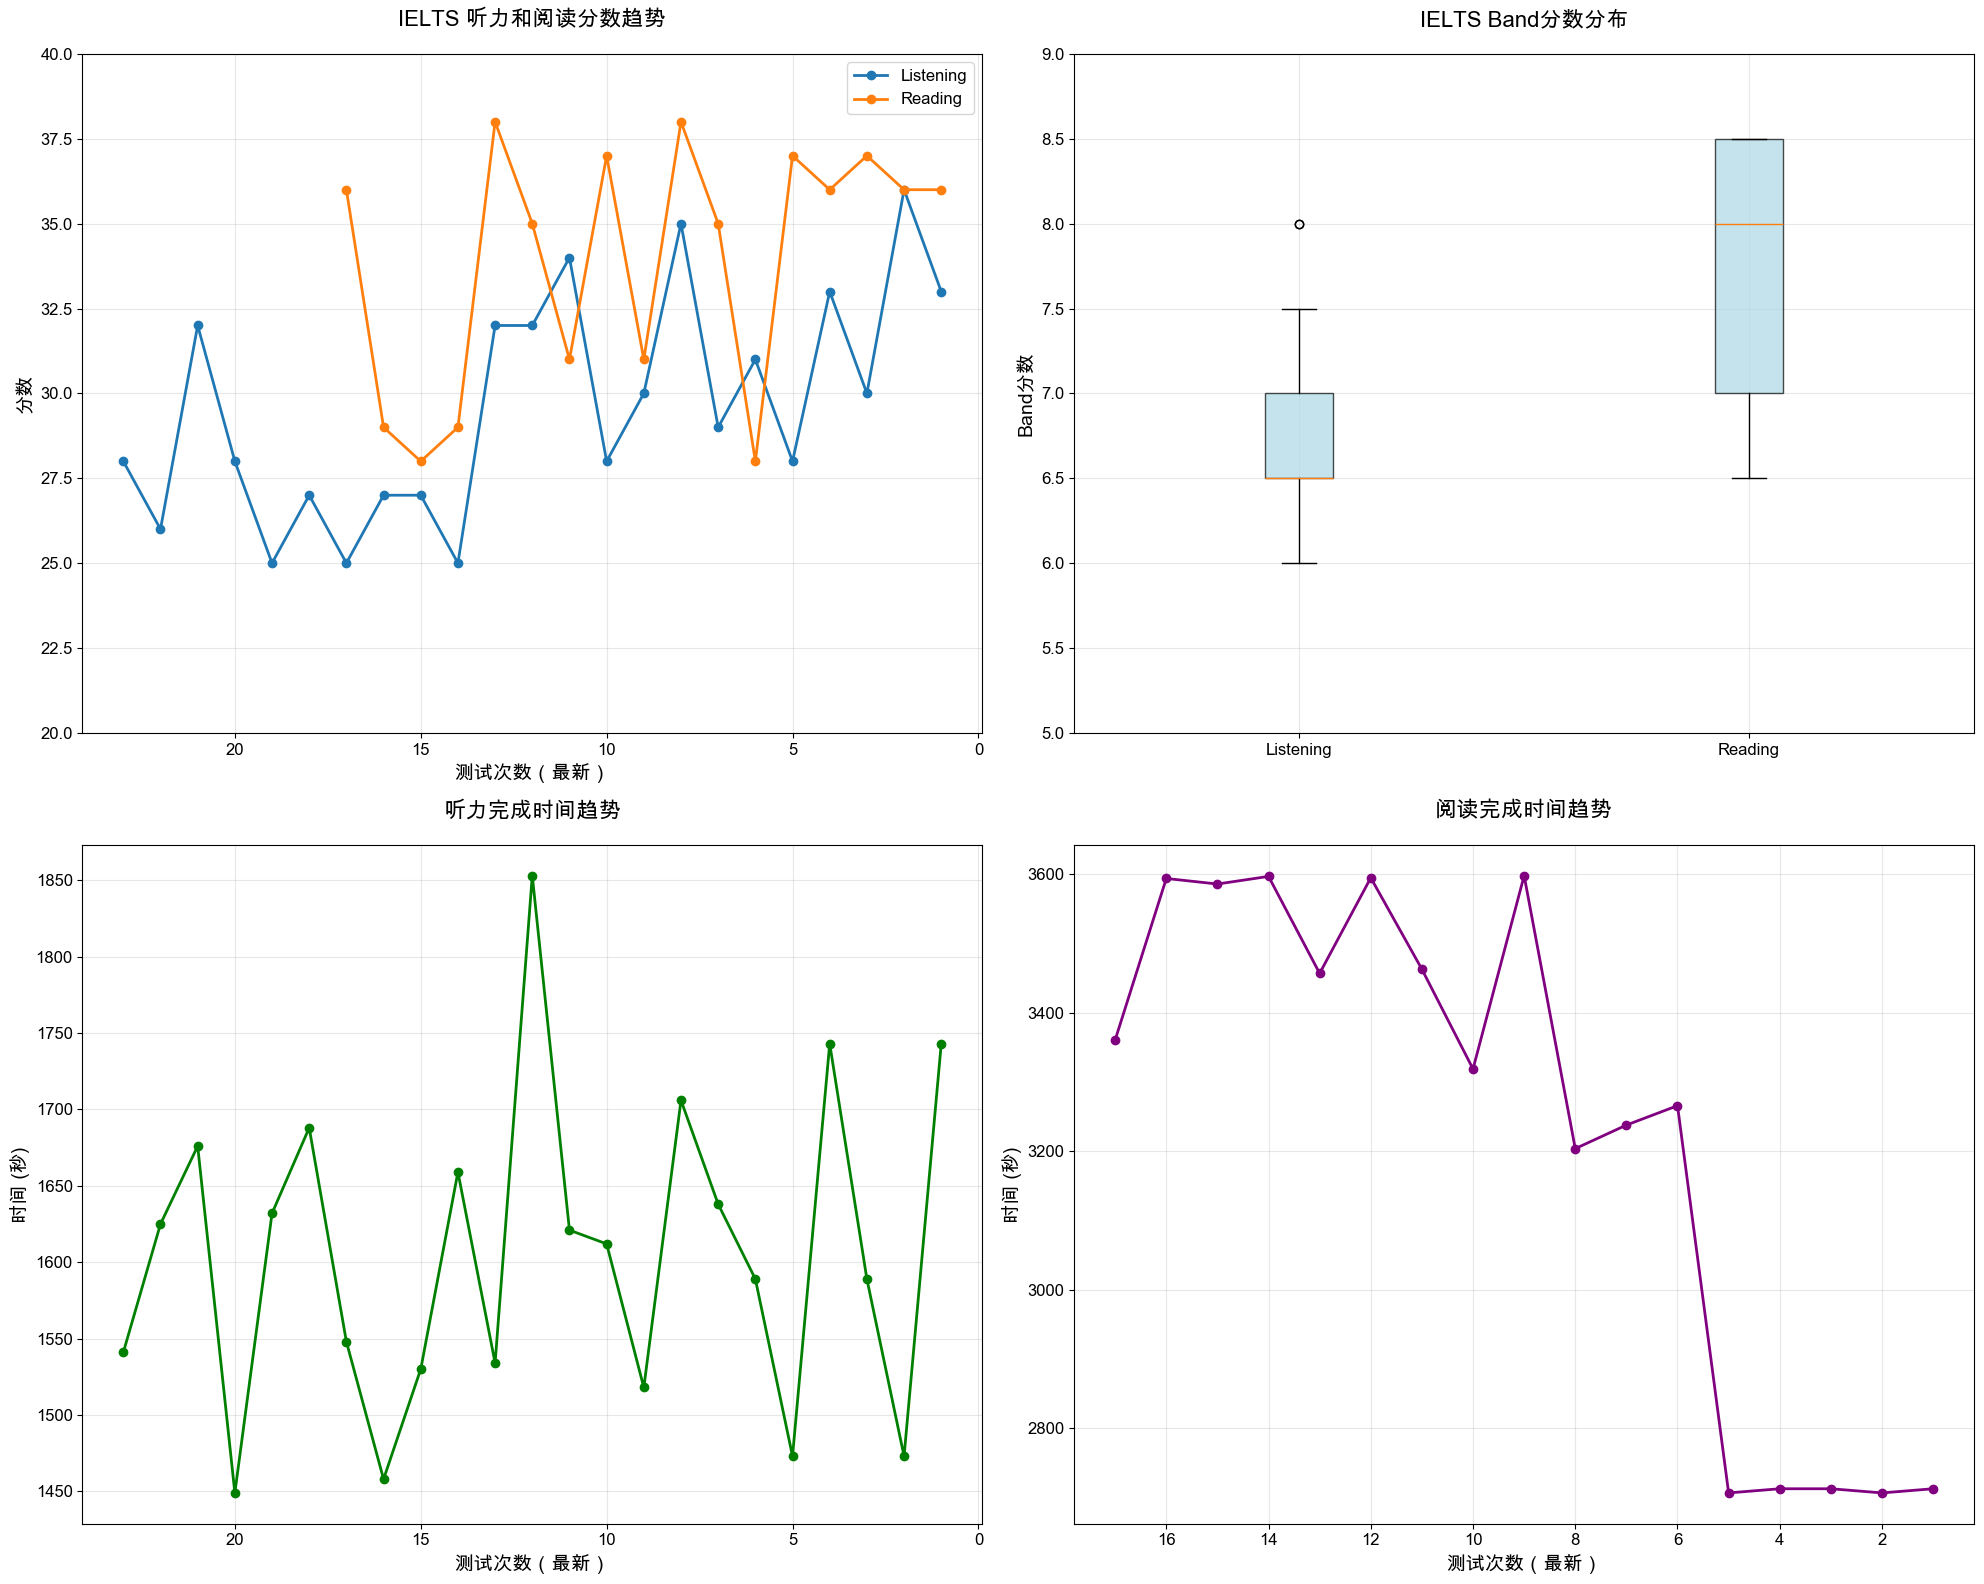

In [19]:
# 创建图表
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 设置全局字体大小
plt.rcParams['font.size'] = 12

# 为每个数据集创建序号,并反转顺序以便最新的测试在右侧
listening_df['test_number'] = range(len(listening_df), 0, -1)
reading_df['test_number'] = range(len(reading_df), 0, -1)

# 1. 听力和阅读分数趋势图
ax = axes[0, 0]
ax.plot(listening_df['test_number'], listening_df['score'], marker='o', label='Listening', linewidth=2)
ax.plot(reading_df['test_number'], reading_df['score'], marker='o', label='Reading', linewidth=2)
ax.set_title('IELTS 听力和阅读分数趋势', fontsize=16, pad=20)
ax.set_xlabel('测试次数（最新）', fontsize=14)
ax.set_ylabel('分数', fontsize=14)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)
ax.set_ylim([20, 40])  # 设置y轴范围更合理
ax.invert_xaxis()  # 反转x轴使最新的测试在右侧

# 2. 听力和阅读Band分数箱线图
ax = axes[0, 1]
data_to_plot = [listening_df['band'], reading_df['band']]
bp = ax.boxplot(data_to_plot, labels=['Listening', 'Reading'], patch_artist=True)
for box in bp['boxes']:
    box.set(facecolor='lightblue', alpha=0.7)
ax.set_title('IELTS Band分数分布', fontsize=16, pad=20)
ax.set_ylabel('Band分数', fontsize=14)
ax.grid(True, alpha=0.3)
ax.set_ylim([5, 9])  # 设置y轴范围更合理

# 3. 听力完成时间趋势
ax = axes[1, 0]
ax.plot(listening_df['test_number'], listening_df['time'], marker='o', color='green', linewidth=2)
ax.set_title('听力完成时间趋势', fontsize=16, pad=20)
ax.set_xlabel('测试次数（最新）', fontsize=14)
ax.set_ylabel('时间 (秒)', fontsize=14)
ax.grid(True, alpha=0.3)
ax.invert_xaxis()  # 反转x轴使最新的测试在右侧

# 4. 阅读完成时间趋势
ax = axes[1, 1]
ax.plot(reading_df['test_number'], reading_df['time'], marker='o', color='purple', linewidth=2)
ax.set_title('阅读完成时间趋势', fontsize=16, pad=20)
ax.set_xlabel('测试次数（最新）', fontsize=14)
ax.set_ylabel('时间 (秒)', fontsize=14)
ax.grid(True, alpha=0.3)
ax.invert_xaxis()  # 反转x轴使最新的测试在右侧

# 调整布局
plt.tight_layout()
plt.show()


        test                date  score  band  time  test_number
22   C4Test2 2025-05-15 17:19:02     28   6.5  1541            1
21   C4Test3 2025-05-17 10:42:46     26   6.0  1625            2
20   C4Test4 2025-05-19 10:36:09     32   7.0  1676            3
19   C5Test1 2025-05-23 17:16:54     28   6.5  1449            4
18   C5Test2 2025-05-23 17:54:33     25   6.0  1632            5
17   C5Test3 2025-05-27 23:51:53     27   6.5  1688            6
16   C5Test4 2025-05-29 00:14:55     25   6.0  1548            7
15   C6Test1 2025-06-01 11:57:07     27   6.5  1458            8
14   C6Test2 2025-06-01 12:46:36     27   6.5  1530            9
13   C6Test3 2025-06-03 23:33:14     25   6.0  1659           10
12   C6Test4 2025-06-08 15:38:51     32   7.0  1534           11
11   C7Test1 2025-06-11 14:59:40     32   7.0  1853           12
10   C7Test2 2025-06-14 10:22:55     34   7.5  1621           13
9    C7Test3 2025-06-15 10:35:04     28   6.5  1612           14
8    C7Test4 2025-06-21 2

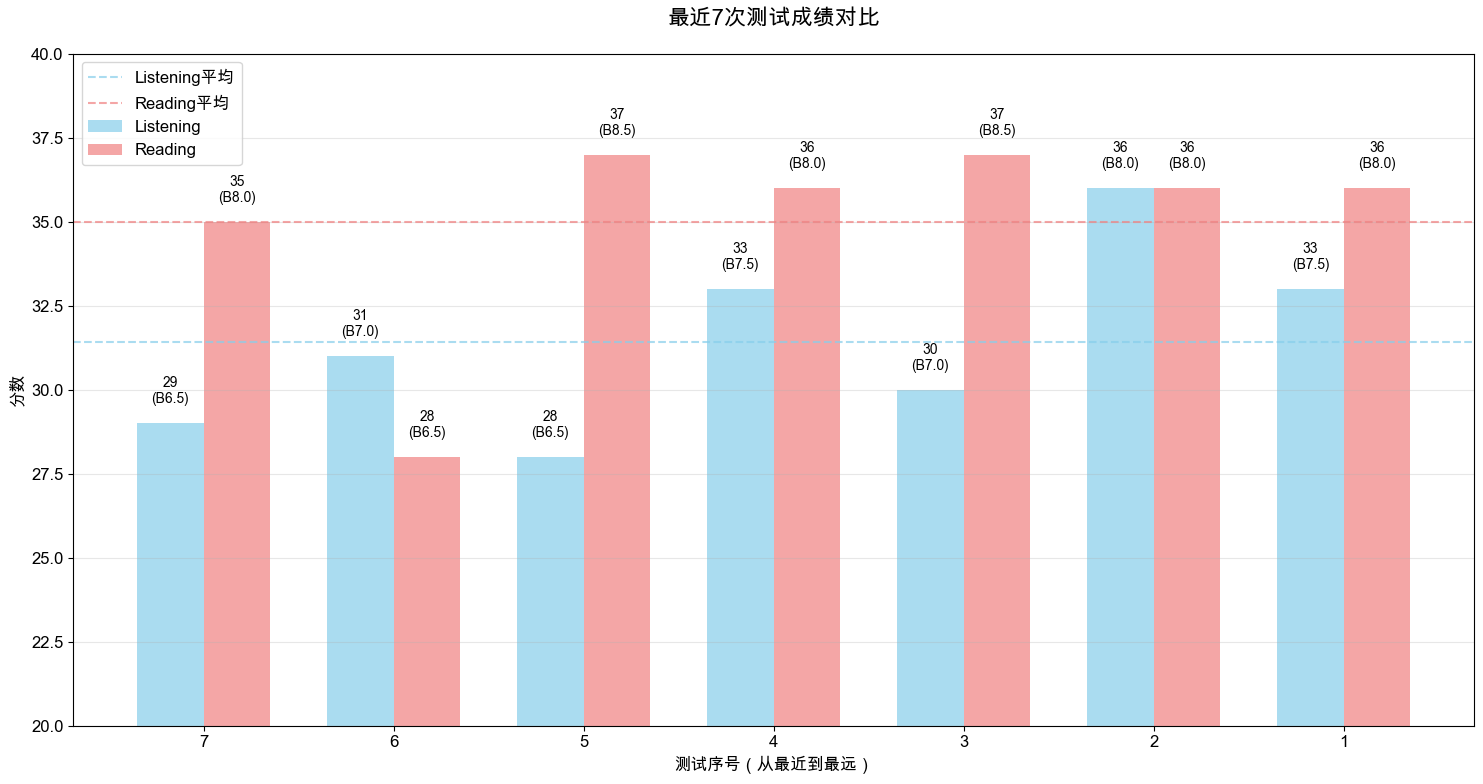

In [17]:
# 创建最近7次测试的对比图
plt.figure(figsize=(15, 8))
print(listening_df)

# 获取最近7次测试数据
recent_listening = listening_df.tail(7)
recent_reading = reading_df.tail(7)

# 设置x轴位置
x = np.arange(7)
width = 0.35

# 绘制柱状图
plt.bar(x - width/2, recent_listening['score'], width, label='Listening', color='skyblue', alpha=0.7)
plt.bar(x + width/2, recent_reading['score'], width, label='Reading', color='lightcoral', alpha=0.7)

# 添加平均水平线
listening_mean = recent_listening['score'].mean()
reading_mean = recent_reading['score'].mean()
plt.axhline(y=listening_mean, color='skyblue', linestyle='--', alpha=0.7, label='Listening平均')
plt.axhline(y=reading_mean, color='lightcoral', linestyle='--', alpha=0.7, label='Reading平均')

# 添加数据标签
for i, v in enumerate(recent_listening['score']):
    plt.text(i - width/2, v + 0.5, f'{v}\n(B{recent_listening["band"].iloc[i]})', 
             ha='center', va='bottom', fontsize=10)
for i, v in enumerate(recent_reading['score']):
    plt.text(i + width/2, v + 0.5, f'{v}\n(B{recent_reading["band"].iloc[i]})', 
             ha='center', va='bottom', fontsize=10)

# 设置图表标题和标签
plt.title('最近7次测试成绩对比', fontsize=16, pad=20)
plt.xlabel('测试序号（从最近到最远）', fontsize=12)
plt.ylabel('分数', fontsize=12)
plt.legend(fontsize=12)

# 设置x轴刻度
plt.xticks(x, range(7, 0, -1))

# 设置y轴范围
plt.ylim(20, 40)

# 添加网格线
plt.grid(True, alpha=0.3, axis='y')

# 显示图表
plt.tight_layout()
plt.show()
